In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(x_train.shape)
print(x_train[10])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

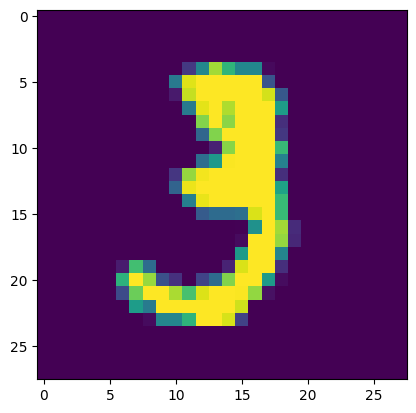

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[10])
plt.show()

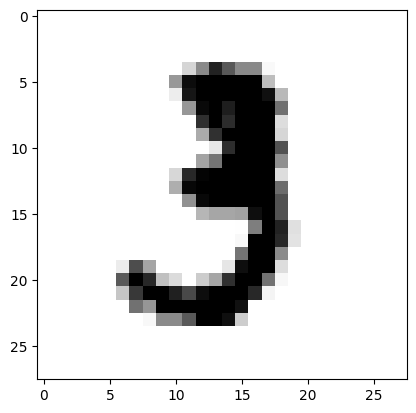

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[10], cmap = plt.cm.binary)
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

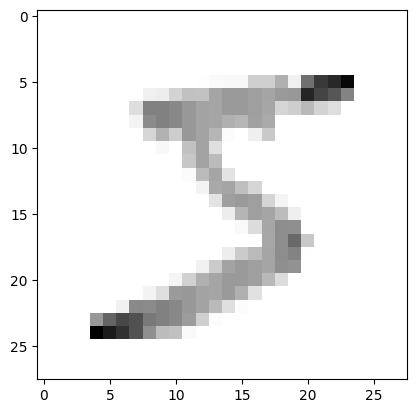

In [20]:
#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ Scaling = Normalization But Using Keras _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _#
'''
normalization = scaling make training more faster and accuracy increase
in Scaling:
x_train, x_test = x_train/255.0, x_test/255.0
'''
#in Normalization:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print(x_train[0])

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [24]:
models = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [27]:
models.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              # sparse function "classify more than 2"
              metrics = ['accuracy'])

In [30]:
models.fit(x_train, y_train, epochs = 3)
#notice in each iteration: acc increase & loss decrease

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0220
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0175
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9947 - loss: 0.0169


In [32]:
val_loss, val_acc = models.evaluate(x_test, y_test)
print(val_loss, val_acc)
# loss function in testing is always more than training

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9748 - loss: 0.1075
0.0955735519528389 0.9761000275611877


In [35]:
models.save('KerasNN.h5')

In [40]:
# Add this line to register 'softmax_v2' explicitly:
tf.keras.utils.get_custom_objects().update({'softmax_v2': tf.keras.activations.softmax})

new_model = tf.keras.models.load_model('KerasNN.h5')

predictions = new_model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.89042244e-11 1.03754415e-10 2.36012476e-09 ... 9.99996364e-01
  7.34439454e-10 2.34044322e-07]
 [1.18247477e-14 1.13135991e-06 9.99998868e-01 ... 1.30881105e-13
  1.79141742e-14 1.80562154e-19]
 [2.83095214e-10 9.99997318e-01 1.22410715e-09 ... 9.78272624e-07
  1.57884517e-06 1.47088264e-09]
 ...
 [2.12421527e-15 3.28057692e-10 4.26199493e-15 ... 2.05768869e-09
  3.05695491e-09 1.17084348e-07]
 [1.11120519e-16 2.82383253e-12 5.29053371e-17 ... 2.47905834e-15
  1.99489136e-08 3.86775308e-20]
 [1.19700701e-12 5.71832282e-14 2.22029845e-15 ... 2.04173652e-18
  2.24766888e-13 1.50407504e-19]]


np.argmaxxxx :  7


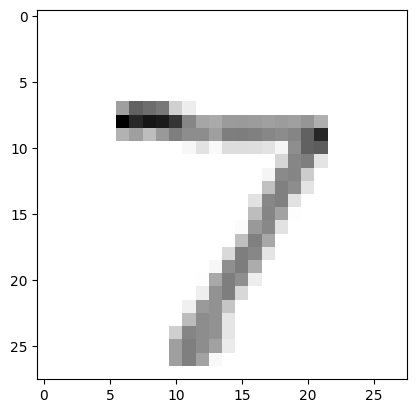

In [48]:
import numpy as np
print("np.argmaxxxx : ", np.argmax(predictions[0])) #return the largest value in the first row

#draw 7
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

np.argmaxxxx :  4


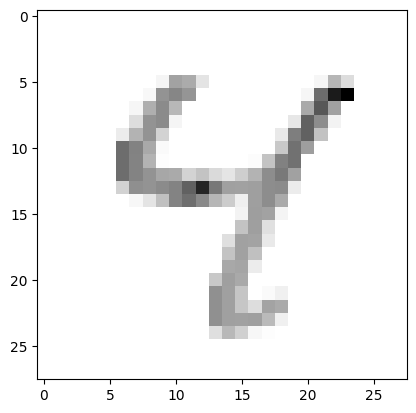

In [53]:
import numpy as np
print("np.argmaxxxx : ", np.argmax(predictions[6])) #return the largest value in the first row

#draw 4
plt.imshow(x_test[6], cmap = plt.cm.binary)
plt.show()